# SAI- I 트리케라톱스 팀
**Chatper 2 실습 코드**
- 작성일: 2020년 11월 1일
- 작성자: 김해리(전자정보통신공학과 3학년)

## 내용

MNIST dataset을 이용한 모델 학습을 Keras로 구현해보기 (맛보기)


## 신경망과의 첫만남

keras로 신경망을 만들고 훈련시키고 평가하기까지의 과정.

### 데이터 받아오기, 관찰하기

In [1]:
# 케라스에서 MNIST dataset 적재하기

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# 훈련 데이터 관찰하기
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [10]:
print(len(test_labels))
test_labels

10000


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### 훈련할 모델 구축 & 평가하기


In [11]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
network.add(layers.Dense(10, activation='softmax'))

In [12]:
network.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [14]:
train_images = (train_images.reshape((60000, 28*28)).astype('float32'))/255 # 2차원 배열이었던 이미지를 일 자로 쭉 펴주고, 0-255 정수형이었던 밝기값 표현을 0-1 사이의 실수형으로 변환함

In [16]:
test_images = (test_images.reshape((10000, 28*28)).astype('float32'))/255 # 2차원 배열이었던 이미지를 일 자로 쭉 펴주고, 0-255 정수형이었던 밝기값 표현을 0-1 사이의 실수형으로 변환함

keras.utils.to_categorical 에 대한 설명 
[(공식문서)](
https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical?hl=ko)

대충 내용을 보니, [1, 3, 2, 0] 처럼 class number로 되어 있던 라벨들을

아래와 같은 one hot encoding 처리를 할 때 쓰는 method인 것 같다.
```python
[[0, 1, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [1, 0, 0, 0]]
```


In [17]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [18]:
# to_categorical 실험
a = [1, 3, 2, 0]
to_categorical(a)

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [20]:
# 신경망 훈련 시키기
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0286 - accuracy: 0.9915
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0216 - accuracy: 0.9937
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0170 - accuracy: 0.9951
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0132 - accuracy: 0.9964
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0101 - accuracy: 0.9970


훈련이 진행 되며 loss가 점차 줄고, accuracy가 늘어나는 것을 볼 수 있다.

In [21]:
# test set 적용
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0694 - accuracy: 0.9818


In [22]:
print('test accuracy: ', test_acc)

test accuracy:  0.9818000197410583


## 신경망을 위한 데이터 표현
numpy 배열 속 데이터 다루기


In [23]:
import numpy as np

### 텐서 알아보기

In [27]:
# 0D Tensor (scalar)
x = np.array(65)
print(x)
print(x.ndim)

65
0


In [28]:
# 1D Tensor (vector)
x = np.array([3, 2, 45, 5])
print(x)
print(x.ndim)

[ 3  2 45  5]
1


In [29]:
# 2D Tensor (matrix)
x = np.array([[1,2,3] , [4, 3, 2]])
print(x)
print(x.ndim)

[[1 2 3]
 [4 3 2]]
2


In [31]:
# 3D Tensor and so on
x = np.array([
              [[1, 2, 3], 
               [2, 4, 5]
               ],
              [
               [3, 4, 5], 
              [1, 2, 3]
               ],
              [
               [2, 3, 4],
               [9, 67, 3]
               ]
              ])
print(x)
print(x.ndim)

[[[ 1  2  3]
  [ 2  4  5]]

 [[ 3  4  5]
  [ 1  2  3]]

 [[ 2  3  4]
  [ 9 67  3]]]
3


In [32]:
# Tensor의 3요소

print(x.ndim) # 축의 개수를 뜻함. rank라고도 부름
print(x.shape) # 각 축에 따라 얼마나 많은 차원이 있는지를 나타내는 튜플.
print(x.dtype) # 텐서에 포함된 데이터의 자료형

3
(3, 2, 3)
int64


In [33]:
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

2
(60000, 784)
float32


<function matplotlib.pyplot.show>

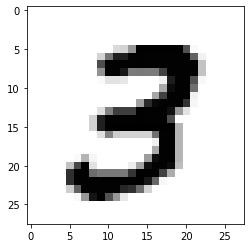

In [36]:
# matplotlib을 이용해서 데이터 하나 출력하기
digit = train_images[7].reshape(28, 28)
import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary) # 
plt.show

위에서 imshow의 인자로 전달된 cmap(컬러맵) 에 관한 건 https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html 여기에.

### 넘파이로 텐서 조작하기


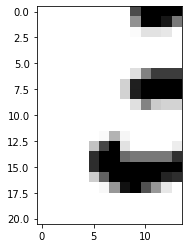

In [39]:
# 슬라이싱을 통해 개별 이미지 crop
plt.imshow(digit[7:, :14], cmap=plt.cm.binary) 

In [40]:
# 슬라이싱을 통해 batch 만들기
train_batch = train_images[:1250]
print(train_images.shape)
print(train_batch.shape)

(60000, 784)
(1250, 784)


In [ ]:
output = relu(dot(W, imnput))